In [149]:
# VIDEO GAMES SALES DATASET

In [150]:
#1.1: Importing Libraries and Dataset
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [151]:
# First, we eliminate factors that we won't be using and read the data.

In [152]:
df = pd.read_csv('video.csv').drop(['Other_Sales','JP_Sales', 'NA_Sales', 'EU_Sales' ,'Developer', 'Rating' ,'Critic_Count'], axis=1)
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,8.0,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,8.0,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN,NaN


In [153]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,User_Count
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.01,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.01,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.01,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.01,NaN,NaN,NaN


In [154]:
# Analyzing Dataset

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   Global_Sales     16719 non-null  float64
 6   Critic_Score     8137 non-null   float64
 7   User_Score       7590 non-null   float64
 8   User_Count       7590 non-null   float64
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [156]:
df.shape  

(16719, 9)

In [157]:
#This represents shape of the df 16719 rows and 9 columns.

In [158]:
df['Genre'].is_unique

False

In [159]:
df['Genre'].value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [160]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'Global_Sales', 'Critic_Score', 'User_Score', 'User_Count'],
      dtype='object')

In [161]:
#Data Types
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
Critic_Score       float64
User_Score         float64
User_Count         float64
dtype: object

In [162]:
df.describe()

,Year_of_Release,Global_Sales,Critic_Score,User_Score,User_Count
count,16450.000000,16719.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.533543,68.967679,7.125046,162.229908
std,5.878995,1.547935,13.938165,1.500006,561.282326
min,1980.000000,0.010000,13.000000,0.000000,4.000000
25%,2003.000000,0.060000,60.000000,6.400000,10.000000
50%,2007.000000,0.170000,71.000000,7.500000,24.000000
75%,2010.000000,0.470000,79.000000,8.200000,81.000000
max,2020.000000,82.530000,98.000000,9.700000,10665.000000


In [163]:
#DATA CLEANING

In [164]:
df.isnull()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,User_Count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...
16714,False,False,False,False,False,False,True,True,True
16715,False,False,False,False,False,False,True,True,True
16716,False,False,False,False,False,False,True,True,True
16717,False,False,False,False,False,False,True,True,True


In [165]:
df.isna().any().sum()

7

In [166]:
 df['User_Count'].isnull()

0        False
1         True
2        False
3        False
4         True
         ...  
16714     True
16715     True
16716     True
16717     True
16718     True
Name: User_Count, Length: 16719, dtype: bool

In [167]:
#Replacing missing values with median
df['User_Score'].fillna(24.000000, inplace=True)
df['Critic_Score'].fillna(71.000000, inplace=True)
df['User_Count'].fillna(7.500000, inplace=True)
df['Global_Sales'].fillna(0.170000, inplace=True)


In [168]:
#For categorical (type object) and boolean (type bool) features you can use the value_counts method.
df.describe(include = ["object"])

,Name,Platform,Genre,Publisher
count,16717,16719,16717,16665
unique,11562,31,12,582
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts
freq,12,2161,3370,1356


In [169]:
#Let's look at the Platform distribution:
df["Platform"].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [170]:
#Let's look at the distribution by the variable Platform. Specify the value of the normalize = True parameter 
#to view relative frequencies, but not absolute.

df["Publisher"].value_counts(normalize = True)

Electronic Arts                 0.081368
Activision                      0.059106
Namco Bandai Games              0.056346
Ubisoft                         0.055986
Konami Digital Entertainment    0.050045
                                  ...   
Locus                           0.000060
Warp                            0.000060
Valve                           0.000060
Elite                           0.000060
Red Flagship                    0.000060
Name: Publisher, Length: 582, dtype: float64

In [171]:
# We can see the most of video games are selled by Electronic Arts.

In [172]:
#A DataFrame can be sorted by a few feature values.
#In our case, for example, by user count 
#(ascending = False for sorting in descending order):

df.sort_values(by = "User_Count", ascending = False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,User_Count
2851,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,Namco Bandai Games,0.72,93.0,9.3,10665.0
303,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,3.97,92.0,9.2,10179.0
11288,Counter-Strike: Source,PC,2004.0,Shooter,Vivendi Games,0.08,88.0,8.9,9851.0
192,Diablo III,PC,2012.0,Role-Playing,Activision,5.14,88.0,4.0,9629.0
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,3.88,94.0,8.1,9073.0


In [173]:
# Here, we can see the video game "The Witcher 3: Wild Hunt" has the highest user count.

In [174]:
df.sort_values(by = "Global_Sales", ascending = False).head()

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,76.0,8.0,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,71.0,24.0,7.5
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,82.0,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,80.0,8.0,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,71.0,24.0,7.5


In [175]:
# Here, we can see the video game "Wii Sports" has the highest global sales.

In [176]:
#We can use the code dataframe ['name'] to extract a separate column.
#We use this to answer the question: What is the share of global sales attracted in our DataFrame?
print("Share of global sales =", '{:.1%}'.format(df["Global_Sales"].mean()))


Share of global sales = 53.4%


In [177]:
# What are the mean values of numerical features among the score ans sales values?

df[df["Global_Sales"] == 1].mean() 

Year_of_Release    2000.894737
Global_Sales          1.000000
Critic_Score         72.631579
User_Score           18.921053
User_Count           37.500000
dtype: float64

In [178]:
#PIVOT TABLES
#Suppose we want to see how observations in our sample are distributed in the context of two features 
#To do this, we can build cross tabulation by the crosstab method.

In [179]:
pd.crosstab(df["Genre"], df["User_Score"],   normalize = 'index')

User_Score,0.0,0.2,0.3,0.5,0.6,0.7,0.9,1.0,1.1,1.2,...,8.9,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,24.0
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0.000000,0.000000,0.000297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000297,...,0.007715,0.007122,0.005341,0.001780,0.002967,0.000593,0.000297,0.000000,0.000000,0.456973
Adventure,0.000767,0.000000,0.000000,0.000767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.006140,0.006140,0.000767,0.001535,0.001535,0.001535,0.000000,0.000000,0.000000,0.769762
Fighting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001178,0.000000,0.000000,0.000000,...,0.012956,0.007067,0.005889,0.001178,0.000000,0.000000,0.000000,0.000000,0.000000,0.530035
Misc,0.000000,0.000000,0.000000,0.000571,0.000000,0.000000,0.000000,0.000571,0.000000,0.000000,...,0.001714,0.002286,0.000571,0.001143,0.000000,0.000000,0.000000,0.000000,0.000000,0.749143
Platform,0.000000,0.001126,0.000000,0.000000,0.000000,0.000000,0.001126,0.000000,0.000000,0.000000,...,0.013514,0.010135,0.007883,0.003378,0.003378,0.001126,0.000000,0.000000,0.000000,0.518018
Puzzle,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001724,0.000000,...,0.003448,0.003448,0.001724,0.001724,0.001724,0.000000,0.001724,0.000000,0.000000,0.779310
Racing,0.000000,0.000000,0.000801,0.000000,0.000801,0.000000,0.000000,0.000801,0.000000,0.000000,...,0.008807,0.006405,0.009608,0.003203,0.002402,0.000801,0.000801,0.000000,0.000000,0.486789
Role-Playing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.016000,0.009333,0.006667,0.006000,0.002000,0.001333,0.000667,0.000667,0.000667,0.504667
Shooter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001512,...,0.013605,0.007559,0.006803,0.003023,0.003779,0.000000,0.000000,0.000000,0.000000,0.301587


In [180]:
# The obtained results allow us to plan marketing campaigns more effectively.

In [181]:
# CORRELATION ANALYSIS

In [182]:
df_num_corr = df.corr()['Global_Sales']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.05].sort_values(ascending=False)
print("There is {} strongly correlated values with Global_Sales:\n{}".format(len(golden_features_list), golden_features_list))

There is 5 strongly correlated values with Global_Sales:
Global_Sales       1.000000
User_Count         0.236203
Critic_Score       0.189724
Year_of_Release   -0.076433
User_Score        -0.111785
Name: Global_Sales, dtype: float64


<AxesSubplot:>

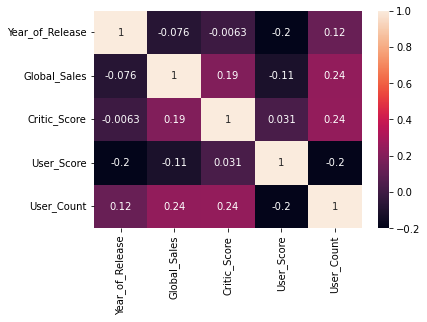

In [183]:
cor = df.corr()
sns.heatmap(cor, annot=True)

In [184]:
# We can see that the "user count and global sales","user count and critic score", "user count and global sales" 
# are the most correlated data.

In [185]:
#VISUALISATION IN PANDAS

In [186]:
# Method scatter_matrix allows you to visualize the pairwise dependencies between the features

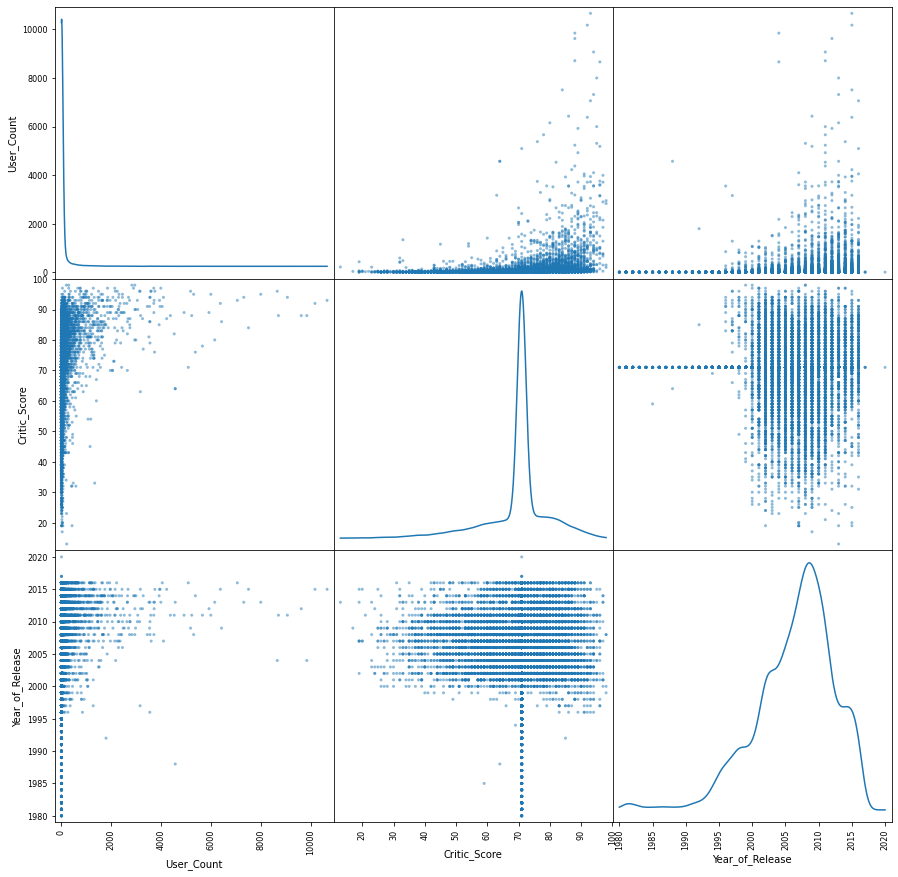

In [187]:
pd.plotting.scatter_matrix(
    df[[ "User_Count", "Critic_Score","Year_of_Release" ]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

In [188]:
#A scatter matrix (pairs plot) compactly plots all the numeric variables we have in a dataset against each other
#the plots on the main diagonal allow you to visually define the type of data distribution

In [189]:
#Now We will build a separate histogram for Platform feature:

<AxesSubplot:>

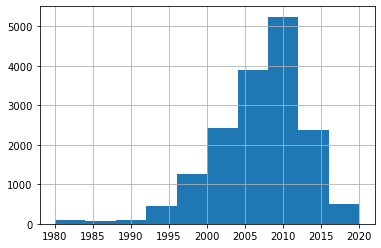

In [190]:
df["Year_of_Release"].hist()

In [191]:
#The histogram shows that most of the games were released in the year 2010. 

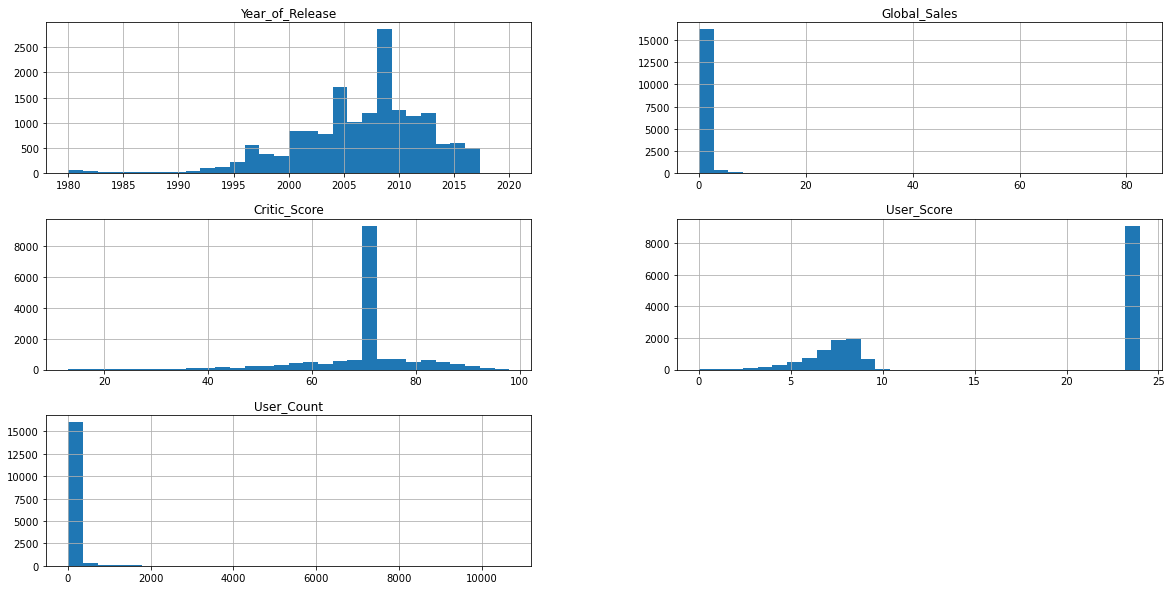

In [192]:
df.hist( bins = 30, figsize = (20, 10))
plt.show()
# Histogram of all elements.

<AxesSubplot:xlabel='User_Count', ylabel='Density'>

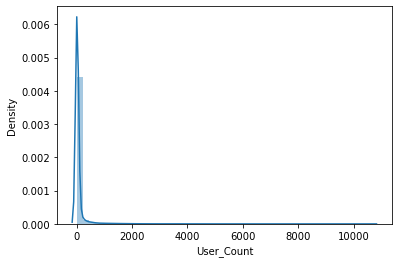

In [193]:
sns.distplot(df['User_Count'])

<AxesSubplot:xlabel='Critic_Score', ylabel='User_Score'>

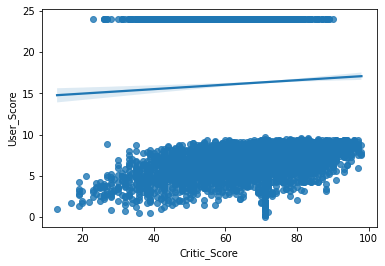

In [194]:
sns.regplot(x='Critic_Score', y='User_Score', data =df)

In [195]:
#A visual analysis of the histograms allows us to make assumptions about the variability of the source data.
#Now we will use Box Plot. It will allow us to compactly visualize the main characteristics of the feature distribution 
#These include the median, lower and upper quartile, minimal and maximum, outliers.

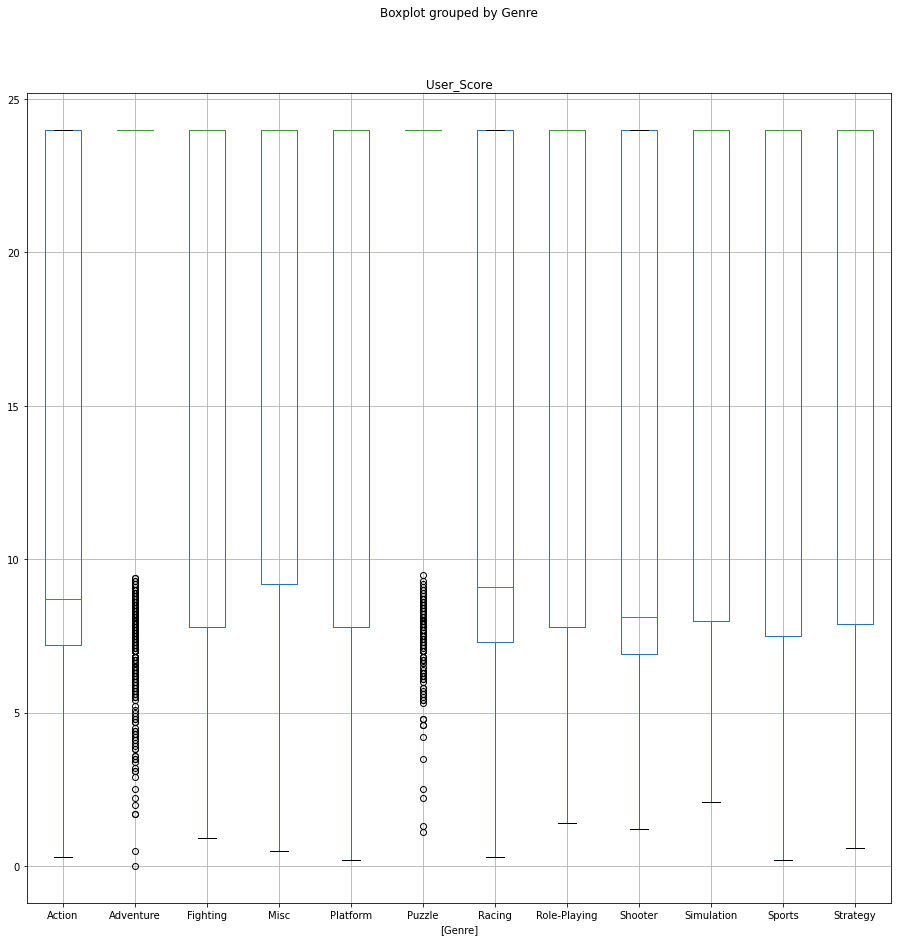

In [196]:
df.boxplot(column = "User_Score",
           by = ["Genre"], figsize=(15,15))
plt.show()